# I- Exploratory Data Analysis

## 1- Data Attributes Identification & Data Collection

### a- Explore yelp_academic_dataset_business.json

In [1]:
import sys
print(sys.executable)


/home/ayoub/projects/CustomerReviewClassifier/ml/.venv/bin/python


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import os
pd.set_option('display.max_colwidth', None)


In [ ]:
business_df = pd.read_json('yelp_academic_dataset_business.json', lines=True, nrows=10000)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', 'Wednesday': '8:0-18:30', 'Thursday': '8:0-18:30', 'Friday': '8:0-18:30', 'Saturday': '8:0-14:0'}"
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2', 'CoatCheck': 'False', 'RestaurantsTakeOut': 'False', 'RestaurantsDelivery': 'False', 'Caters': 'False', 'WiFi': 'u'no'', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'WheelchairAccessible': 'True', 'HappyHour': 'False', 'OutdoorSeating': 'False', 'HasTV': 'False', 'RestaurantsReservations': 'False', 'DogsAllowed': 'False', 'ByAppointmentOnly': 'False'}","Department Stores, Shopping, Fashion, Home & Garden, Electronics, Furniture Stores","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', 'Wednesday': '8:0-22:0', 'Thursday': '8:0-22:0', 'Friday': '8:0-23:0', 'Saturday': '8:0-23:0', 'Sunday': '8:0-22:0'}"
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'ByAppointmentOnly': 'False', 'WiFi': 'u'free'', 'Alcohol': 'u'none'', 'Caters': 'True'}","Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0', 'Thursday': '7:0-20:0', 'Friday': '7:0-21:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0'}"
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'WheelchairAccessible': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': '{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}', 'BikeParking': 'True', 'GoodForKids': 'True', 'Caters': 'False'}","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-22:0', 'Friday': '12:0-22:0', 'Saturday': '12:0-22:0', 'Sunday': '12:0-18:0'}"


## b- Explore yelp_academic_dataset_checkin.json

In [8]:
checkin_df = pd.read_json('yelp_academic_dataset_checkin.json', lines=True, nrows=10000)
checkin_df.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020-07-24 22:42:27, 2020-10-24 21:36:13, 2020-12-09 21:23:33, 2021-01-20 17:34:57, 2021-04-30 21:02:03, 2021-05-25 21:16:54, 2021-08-06 21:08:08, 2021-10-02 15:15:42, 2021-11-11 16:23:50"
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011-07-18 22:30:31, 2012-09-07 20:28:50, 2013-03-27 15:57:36, 2013-08-13 00:31:34, 2013-08-13 00:31:48, 2013-09-23 17:39:38, 2013-11-18 06:34:08, 2014-04-12 23:04:47"
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012-03-11 10:30:02, 2012-04-24 07:07:59, 2012-04-24 07:43:31, 2013-05-25 16:41:10, 2014-05-02 15:49:55, 2014-09-18 02:28:23, 2014-11-10 15:16:43, 2015-09-27 13:18:32"
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014-09-30 14:41:47, 2014-10-23 18:22:28, 2015-04-27 19:55:00, 2015-09-21 12:52:09, 2015-10-01 12:46:16, 2015-10-22 13:35:04, 2016-01-14 12:27:43, 2016-02-01 15:15:07, 2016-02-11 12:22:47, 2016-03-31 23:15:46, 2016-04-11 13:11:34, 2016-05-25 12:44:11, 2016-06-27 15:46:11, 2016-06-30 15:14:28, 2016-07-28 14:15:59, 2016-09-22 20:05:06, 2016-11-16 19:00:11, 2016-12-27 14:36:14, 2017-01-24 20:18:16, 2017-02-21 16:01:49, 2017-03-21 14:08:44, 2017-05-21 16:07:21, 2017-08-07 14:17:39, 2021-06-21 19:59:50"


## c- Explore yelp_academic_dataset_review.json

In [2]:
review_df = pd.read_json('yelp_academic_dataset_review.json', lines=True, nrows=500000)
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!",2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,"Family diner. Had the buffet. Eclectic assortment: a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. All good. Lots of Mexican choices there. Also has a menu with breakfast served all day long. Friendly, attentive staff. Good place for a casual relaxed meal with no expectations. Next to the Clarion Hotel.",2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favorite is the lamb curry and korma. With 10 different kinds of naan!!! Don't let the outside deter you (because we almost changed our minds)...go in and try something new! You'll be glad you did!",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,"Cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today. Cheese curds were very good and very filling. Really like that sandwiches come w salad, esp after eating too many curds! Had the onion, gruyere, tomato sandwich. Wasn't too much cheese which I liked. Needed something else...pepper jelly maybe. Would like to see more menu options added such as salads w fun cheeses. Lots of beer and wine as well as limited cocktails. Next time I will try one of the draft wines.",2017-01-14 20:54:15


## d- Explore yelp_academic_dataset_tip.json

In [10]:
tip_df = pd.read_json('yelp_academic_dataset_tip.json', lines=True, nrows=10000)
tip_df.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban sandwiches,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


## e- Explore yelp_academic_dataset_user.json

In [11]:
user_df = pd.read_json('yelp_academic_dataset_user.json', lines=True, nrows=10000)
pd.set_option('display.max_colwidth', 50)
user_df.head()


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [12]:
print("business_df columns: ", business_df.columns.tolist())
print("checkin_df columns: ", checkin_df.columns.tolist())
print("review_df columns: ", review_df.columns.tolist())
print("tip_df columns: ", tip_df.columns.tolist())
print("user_df columns: ", user_df.columns.tolist())


business_df columns:  ['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours']
checkin_df columns:  ['business_id', 'date']
review_df columns:  ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']
tip_df columns:  ['user_id', 'business_id', 'text', 'date', 'compliment_count']
user_df columns:  ['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny', 'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']


In [3]:
review_df= review_df[['stars', 'text']]
review_df.head()
review_df.to_csv("data_extracted.csv", index=False)

## 2- Data Pre-processing

In [2]:
df = pd.read_csv('data_extracted.csv')
df.head()  


,stars,text
0,3,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker."
1,5,"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!"
2,3,"Family diner. Had the buffet. Eclectic assortment: a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. All good. Lots of Mexican choices there. Also has a menu with breakfast served all day long. Friendly, attentive staff. Good place for a casual relaxed meal with no expectations. Next to the Clarion Hotel."
3,5,"Wow! Yummy, different, delicious. Our favorite is the lamb curry and korma. With 10 different kinds of naan!!! Don't let the outside deter you (because we almost changed our minds)...go in and try something new! You'll be glad you did!"
4,4,"Cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today. Cheese curds were very good and very filling. Really like that sandwiches come w salad, esp after eating too many curds! Had the onion, gruyere, tomato sandwich. Wasn't too much cheese which I liked. Needed something else...pepper jelly maybe. Would like to see more menu options added such as salads w fun cheeses. Lots of beer and wine as well as limited cocktails. Next time I will try one of the draft wines."


In [7]:
df.describe()

,stars
count,500000.000000
mean,3.806634
std,1.418262
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


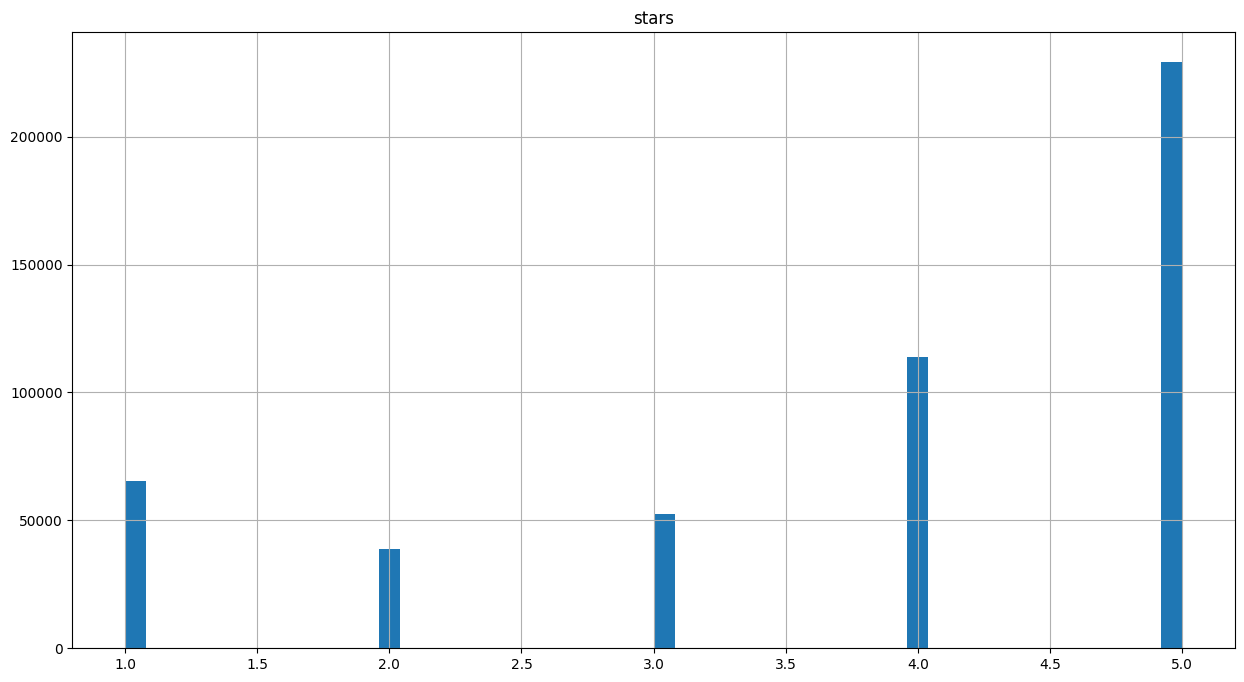

In [8]:
df.hist(bins=50, figsize=(15,8))
plt.show()

In [9]:
df.shape

(500000, 2)

In [3]:
df['text'] = df['text'].str.lower()

### a- Handle Missig-Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stars   500000 non-null  int64 
 1   text    500000 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.6+ MB


In [17]:
df.isna().sum()

stars    0
text     0
dtype: int64

### b- Remove Duplicate

In [4]:
df['text'].duplicated().sum()

np.int64(779)

In [5]:
df = df.drop_duplicates(subset=['text']).reset_index(drop=True)

In [6]:
df['text'].duplicated().sum()

np.int64(0)

In [7]:
df.shape

(499229, 2)

### c-) Text Cleaning and Lemmatization with Negation Handling

In [ ]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"]) 

cleaned_texts = []
negations = {"no", "not", "never", "n't"}
for doc in nlp.pipe(df['text'], batch_size=50, n_process=2):
    cleaned_string = " ".join([token.lemma_ for token in doc if (token.is_alpha and (not token.is_stop or token.text in negations))])
    cleaned_texts.append(cleaned_string)

df['cleaned_text'] = cleaned_texts

print(df[['text', 'cleaned_text']])


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text  \
0                                                                                                                                                          

In [8]:
df.head()

,stars,text,cleaned_text
0,3,"if you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. we have tried it multiple times, because i want to like it! i have been to it's other locations in nj and never had a bad experience. \n\nthe food is good, but it takes a very long time to come out. the waitstaff is very young, but usually pleasant. we have just had too many experiences where we spent way too long waiting. we usually opt for another diner or restaurant on the weekends, in order to be done quicker.",decide eat aware go hour begin end try multiple time want like location nj never bad experience food good take long time come waitstaff young usually pleasant experience spend way long wait usually opt diner restaurant weekend order quick
1,5,"i've taken a lot of spin classes over the years, and nothing compares to the classes at body cycle. from the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nfor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nthere is no way i can write this review without giving russell, the owner of body cycle, a shout out. russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. he is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. russell always wears a smile on his face, even when he's kicking your butt in class!",take lot spin class year compare class body cycle nice clean space amazing bike welcoming motivate instructor class notch work struggle fit workout online scheduling system make easy plan ahead no need line way advanced like gym no way write review give russell owner body cycle shout russell passion fitness cycling evident desire client succeed drop class check provide encouragement open idea recommendation russell wear smile face kick butt class
2,3,"family diner. had the buffet. eclectic assortment: a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. all good. lots of mexican choices there. also has a menu with breakfast served all day long. friendly, attentive staff. good place for a casual relaxed meal with no expectations. next to the clarion hotel.",family diner buffet eclectic assortment large chicken leg fry jalapeño tamale roll grape leave fresh melon good lot mexican choice menu breakfast serve day long friendly attentive staff good place casual relaxed meal no expectation clarion hotel
3,5,"wow! yummy, different, delicious. our favorite is the lamb curry and korma. with 10 different kinds of naan!!! don't let the outside deter you (because we almost changed our minds)...go in and try something new! you'll be glad you did!",wow yummy different delicious favorite lamb curry korma different kind naan let outside deter change try new glad
4,4,"cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today. cheese curds were very good and very filling. really like that sandwiches come w salad, esp after eating too many curds! had the onion, gruyere, tomato sandwich. wasn't too much cheese which i liked. needed something else...pepper jelly maybe. would like to see more menu options added such as salads w fun cheeses. lots of beer and wine as well as limited cocktails. next time i will try one of the draft wines.",cute interior owner give tour upcoming patio rooftop area great beautiful day like today cheese curd good filling like sandwich come w salad esp eat curd onion gruyere tomato sandwich cheese like need pepper jelly maybe like menu option add salad w fun cheese lot beer wine limited cocktail time try draft wine


In [9]:
df.columns.tolist()

['stars', 'text', 'cleaned_text']

In [10]:
print(df['text'].duplicated().sum())
print(df['cleaned_text'].duplicated().sum())

0
218


In [11]:
print(df['text'].isna().sum())
print(df['cleaned_text'].isna().sum())

0
0


In [13]:
df.shape

(499221, 3)

In [14]:
df = df.drop_duplicates(subset=['cleaned_text']).reset_index(drop=True)
print(df['cleaned_text'].duplicated().sum())

0


In [15]:
df.shape

(499003, 3)

In [16]:
print(df['text'].duplicated().sum())
print(df['cleaned_text'].duplicated().sum())

0
0


In [17]:
df = df[['stars', 'cleaned_text']]

In [18]:
df.columns.tolist()

['stars', 'cleaned_text']

In [19]:
df.to_csv('data_cleaned.csv', index=False)

## 3- Feature Selection

### a-) Feature Creation:

In [20]:
df = pd.read_csv('data_cleaned.csv')
df.head()

,stars,cleaned_text
0,3,decide eat aware go hour begin end try multiple time want like location nj never bad experience food good take long time come waitstaff young usually pleasant experience spend way long wait usually opt diner restaurant weekend order quick
1,5,take lot spin class year compare class body cycle nice clean space amazing bike welcoming motivate instructor class notch work struggle fit workout online scheduling system make easy plan ahead no need line way advanced like gym no way write review give russell owner body cycle shout russell passion fitness cycling evident desire client succeed drop class check provide encouragement open idea recommendation russell wear smile face kick butt class
2,3,family diner buffet eclectic assortment large chicken leg fry jalapeño tamale roll grape leave fresh melon good lot mexican choice menu breakfast serve day long friendly attentive staff good place casual relaxed meal no expectation clarion hotel
3,5,wow yummy different delicious favorite lamb curry korma different kind naan let outside deter change try new glad
4,4,cute interior owner give tour upcoming patio rooftop area great beautiful day like today cheese curd good filling like sandwich come w salad esp eat curd onion gruyere tomato sandwich cheese like need pepper jelly maybe like menu option add salad w fun cheese lot beer wine limited cocktail time try draft wine


In [21]:
def categorize(stars):
    if stars < 3:
        return "Negative"
    elif stars == 3:
        return "Neutre"
    else:
        return "Positive"
df['rating'] = df['stars'].apply(categorize)

In [22]:
df.columns.tolist()

['stars', 'cleaned_text', 'rating']

In [23]:
df = df[['cleaned_text', 'rating']]

In [24]:
df.head()

,cleaned_text,rating
0,decide eat aware go hour begin end try multiple time want like location nj never bad experience food good take long time come waitstaff young usually pleasant experience spend way long wait usually opt diner restaurant weekend order quick,Neutre
1,take lot spin class year compare class body cycle nice clean space amazing bike welcoming motivate instructor class notch work struggle fit workout online scheduling system make easy plan ahead no need line way advanced like gym no way write review give russell owner body cycle shout russell passion fitness cycling evident desire client succeed drop class check provide encouragement open idea recommendation russell wear smile face kick butt class,Positive
2,family diner buffet eclectic assortment large chicken leg fry jalapeño tamale roll grape leave fresh melon good lot mexican choice menu breakfast serve day long friendly attentive staff good place casual relaxed meal no expectation clarion hotel,Neutre
3,wow yummy different delicious favorite lamb curry korma different kind naan let outside deter change try new glad,Positive
4,cute interior owner give tour upcoming patio rooftop area great beautiful day like today cheese curd good filling like sandwich come w salad esp eat curd onion gruyere tomato sandwich cheese like need pepper jelly maybe like menu option add salad w fun cheese lot beer wine limited cocktail time try draft wine,Positive


In [25]:
print(df.columns.tolist())
print(df.shape)

['cleaned_text', 'rating']
(499003, 2)


In [26]:
df['rating'].value_counts()

rating
Positive    342632
Negative    103851
Neutre       52520
Name: count, dtype: int64

### ==> Balance Data:

In [27]:
positive_sample = df[df['rating'] == 'Positive'].sample(n=50000, random_state=42)
negative_sample = df[df['rating'] == 'Negative'].sample(n=50000, random_state=42)
neutral_sample = df[df['rating'] == 'Neutre'].sample(n=50000, random_state=42)

balanced_df = pd.concat([positive_sample, negative_sample, neutral_sample], ignore_index = True)

shuffled_result = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

shuffled_result.to_csv('balanced_data.csv', index=False)



In [29]:
df = pd.read_csv('balanced_data.csv')
df.head()

,cleaned_text,rating
0,pretty famous hotel nashville right not nashville instead airport agree ton review sprawling word day come place let break little location outside town need car ride benefit airport minute away not benefit book day facility standard hotel ok well room stay definitely outdated room believe new wing well view outside fantastic view parking lot remind awful big box retail store suburbia interior room view massive atrium balcony shoot get place challenge size confusing layout think vegas hotel story tall spread area size kind like maze lot restaurant bar guess bad pool locate different part hotel impressive adequate gym include gym ok ok room hotel not massive resort room service ouch impression count opryland completely screw valet suck bellman basically quarantine luggage say cart touch seriously extremely poor long trip want room hold fall apart lazy valet gladly take tip move luggage cart foot impound detail absolutely infuriate wifey mad pretty calm understand people service resort well impression count know hotel nashville omni include right fee oh lord know come agree ashley h get rate pretty fair guess say bill come night resort fee crappy gym fail park super walmart like surface lot terrible valet day taxis taxis nickle dim crap suck no value atrium huge wing kind neat cruise way negative issue opryland business maybe look room downtown,Negative
1,happy service today go crappy place girl no idea wtf handle gel nail place call place booked wait time literally minute time drive happy ly nail cute sure care nail ask want coat gel etc well price basic gel color happy salon compare place reno thank ly,Positive
2,fyi charge certain item weight way sorta similar kiwi live literally block away time inside place walk past lot exactly motive try place mean bright orange mural giant chicken sorta walk get classic white dark meat chicken tender wishbone mac cheese pro cute homey decor give invite vibe meat chicken tender cook beautifully dry hard bite eat literally pull chicken tender apart hand put fight pretty nice variety sauce display new addition citrus honey butter honey butter literally gold know probably suppose biscuit eat chicken fall love combination legit take rest home get to mac cheese definitely star taste awesome bit heat end presentation use bit work noodle sorta fall apart enjoy con coating chicken taste like get lot flavor sauce dip get chipotle lime mayo pommery honey mustard rename chipotle mayo like chipotle mayo no creaminess absolutely no lime flavor honey mustard lack honey food wishbone definitely fare overpriced eat probably snack want spend butt ton money,Neutre
3,wait minute table sure reservation wait get small table corner far enjoy band get earl gray garden drink taste water enjoy dinner get ms moons bulgogi rice bowl thinly slice marinate ribeye steak spinach housemade kimchi add fried egg good portion size small scale lamb slider bit dry small scale,Neutre
4,grand opening chinese joint south broad street trenton postage stamp size dining area table eat chair wait away space clean kitchen shiny open little week menu extensive basically traditional chinese american emporium authentic want good chinois not park wheel broad place orange flavor chicken load styro container eat chicken fresh not deeply frozen sauce gloopy orange color taste citrus weak despite orange peel mix fried rice bright yellow dye bullion stock morning plenty roast pork veggie not egg scramble people fuzhounese province north old canton strait taiwan cuisine similar cantonese influence tend sweetness close allow success chinese war interested soon new clean owner interest get thing right remember deal not disappoint pro tip serve hot tea,Neutre


In [31]:
df.shape
df['rating'].value_counts()

rating
Negative    50000
Positive    50000
Neutre      50000
Name: count, dtype: int64

In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df.isna().sum()

cleaned_text    1
rating          0
dtype: int64

In [34]:
df = df.drop_duplicates()

In [35]:
df = df.dropna()

In [36]:
df.duplicated().sum()

np.int64(0)

In [37]:
df.isna().sum()

cleaned_text    0
rating          0
dtype: int64

### b-) Feature Transformation:

In [ ]:
labels = df['rating']

lb = LabelEncoder()
y = lb.fit_transform(labels)



os.makedirs('../artifacts', exist_ok=True)

joblib.dump(lb, '../artifacts/LabelEncoder.pkl')

joblib.dump(y, '../artifacts/y.pkl')

joblib.dump(lb.classes_, '../artifacts/label_classes.pkl')


['../MODELS/SGD_MODEL/label_classes.pkl']

### c-) Feature Extraction:

In [ ]:
texts = df['cleaned_text']

tiv = TfidfVectorizer(max_features=10000)
x = tiv.fit_transform(texts)

os.makedirs('../artifacts', exist_ok=True)

joblib.dump(tiv, '../artifacts/TfidfVectorizer.pkl')

joblib.dump(x, '../artifacts/x.pkl')

In [40]:
print(f"Classe Originales: {lb.classes_}")
print(f"Classes Encodées: {lb.transform(lb.classes_)}")

Classe Originales: ['Negative' 'Neutre' 'Positive']
Classes Encodées: [0 1 2]


In [41]:
x.shape

(149999, 10000)